# **<font color="blue">Проверка гипотез для увеличения выручки интернет-магазина</font>**

### Описание проекта

- Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

### Описание данных

*Данные для первой части*

- датафрейм hypothesis
    
   - Hypothesis — краткое описание гипотезы;
   - Reach — охват пользователей по 10-балльной шкале;
   - Impact — влияние на пользователей по 10-балльной шкале;
   - Confidence — уверенность в гипотезе по 10-балльной шкале;
   - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
   
   
*Данные для второй части*
    
- датафрейм orders
    - transactionId — идентификатор заказа;
    - visitorId — идентификатор пользователя, совершившего заказ;
    - date — дата, когда был совершён заказ;
    - revenue — выручка заказа;
    - group — группа A/B-теста, в которую попал заказ.
    
    
- датафрейм visitors
    - date — дата;
    - group — группа A/B-теста;
    - visitors — количество пользователей в указанную дату в указанной группе A/B-теста


### Задачи проекта

- **<font color="green">Часть 1. Приоритизация гипотез</font>**

**Задача**

        - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
        - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
        - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


- **<font color="green"> Часть 2. Проверка данных A/B-теста</font>**


**Задача**

- Проверим размер групп
- Проверим наличие пересечений пользователей в группах
- Проверим нормальность распределения средней выручки. Выберем метод для проверки А/В теста

- **<font color="green"> Часть 3. Анализ A/B-теста</font>**

**Задача**
Проанализируем A/B-тест:

1.	Построим график кумулятивной выручки по группам.
2.	Построим график кумулятивного среднего чека по группам.
3.	Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
4.	Построим график кумулятивной конверсии по группам.
5.	Построим график относительного изменения кумулятивной конверсии группы B к группе A. 
6.	Построим точечный график количества заказов по пользователям.
7.	Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
8.	Построим точечный график стоимостей заказов.
9.	Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
10.	Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
11.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
12.	Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 
13.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
14.	Примием решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.


## **Изучение данных**

- ***Импортируем библиотеки***

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

- ***Загрузим данные***

In [2]:
import os
if os.path.exists('hypothesis.csv'):
    vishypothesisits = pd.read_csv('hypothesis.csv') # локальный путь
else:
    vishypothesisits = pd.read_csv('/datasets/hypothesis.csv') # путь указанный в проекте
    
if os.path.exists('orders.csv'):
    orders = pd.read_csv('orders.csv') # локальный путь
else:
    orders = pd.read_csv('/datasets/orders.csv') # путь указанный в проекте 
    
if os.path.exists('visitors.csv'):
    visitors = pd.read_csv('visitors.csv') # локальный путь
else:
    visitors = pd.read_csv('/datasets/visitors.csv') # путь указанный в проекте 

In [3]:
vishypothesisits

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
35,2258664213,258610743,2019-08-15,2355,B
731,3568733367,1206072200,2019-08-30,2590,B
697,1612868255,2378935119,2019-08-09,30649,B
790,3455897155,2065143173,2019-08-30,350,A
224,2024820467,1692957755,2019-08-23,1380,B


In [5]:
visitors.sample(5)

,date,group,visitors
27,2019-08-28,A,594
32,2019-08-02,B,581
0,2019-08-01,A,719
28,2019-08-29,A,577
21,2019-08-22,A,609


- ***Приведем наименование колонок vishypothesisits к нижнему регистру***

In [6]:
vishypothesisits.columns = [x.lower() for x in vishypothesisits.columns]

**Проверим**

In [7]:
vishypothesisits.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

- ***Проверим типы данных***

In [8]:
vishypothesisits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 440.0+ bytes


In [9]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.8+ KB


- ***Приведем даты к типу datetime***

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.8+ KB


- ***Проверим датафреймы на наличие дубликатов***

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

In [15]:
vishypothesisits.duplicated().sum()

0

- ***Проверим датафреймы на наличие пропусков***

In [16]:
round((orders.isna().mean()*100),2)

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

In [17]:
round((visitors.isna().mean()*100),2)

date        0.0
group       0.0
visitors    0.0
dtype: float64

In [18]:
round((vishypothesisits.isna().mean()*100),2)

hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
efforts       0.0
dtype: float64

### Вывод

<div style="border:solid indigo 2px; padding: 20px">

**После загрузки данных исправили следующие моменты:**

- названия колонок в таблице гипотез перевели к нижнему регистру
- привели тип данных дат к datetime
    
**Пропусков в данных нет**   

**Дубликатов в данных нет**

## **Часть 1. Приоритизация гипотез**

- Гипотезы нужно приоритизовать, чтобы сократить расходы на эксперименты и запустить тестирование только наиболее перспективных идей.

### Применим фреймворк ICE для приоритизации гипотез

- *Для расчета ICE используется формула* 
$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [19]:
vishypothesisits['ICE'] = (vishypothesisits['impact'] *
                           vishypothesisits['confidence'] /
                           vishypothesisits['efforts']
                          )
vishypothesisits

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


***Вывод***

<div style="border:solid indigo 1px; padding: 20px">
    

- Перспективные гипотезы с индексами **8, 0 и 7**.

### Применим фреймворк RICE для приоритизации гипотез

- *Для расчета RICE используется формула* 
$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [20]:
vishypothesisits['RICE'] = (vishypothesisits['impact'] *
                           vishypothesisits['confidence'] *
                            vishypothesisits['reach'] /
                           vishypothesisits['efforts']
                          )
vishypothesisits

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


***Вывод***

<div style="border:solid indigo 1px; padding: 20px">
    

- Перспективные гипотезы с индексами **7, 2, 0 и 6**.

- **Визуализируем изменение мест**

In [21]:
sample1 = vishypothesisits.copy()
sample1

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


In [22]:
sample1 = (sample1[['hypothesis', 'ICE', 'RICE']]
            .sort_values('ICE', ascending=False)
            .reset_index()
            .reset_index()
            .rename(columns={'level_0': 'ICE_rank', 'index':'hypothesisICE'})
            .sort_values('RICE', ascending=False)
            .reset_index() 
            .reset_index()
            .rename(columns={'level_0': 'RICE_rank', 'index':'hypothesisRICE'})
 
)
sample1[['hypothesis','hypothesisICE', 'ICE_rank', 'RICE_rank']]

,hypothesis,hypothesisICE,ICE_rank,RICE_rank
0,Добавить форму подписки на все основные страни...,7,2,0
1,Добавить блоки рекомендаций товаров на сайт ин...,2,4,1
2,"Добавить два новых канала привлечения трафика,...",0,1,2
3,Показать на главной странице баннеры с актуаль...,6,3,3
4,"Запустить акцию, дающую скидку на товар в день...",8,0,4
5,"Изменить структура категорий, что увеличит кон...",3,7,5
6,"Запустить собственную службу доставки, что сок...",1,5,6
7,"Добавить страницу отзывов клиентов о магазине,...",5,6,7
8,"Изменить цвет фона главной страницы, чтобы уве...",4,8,8


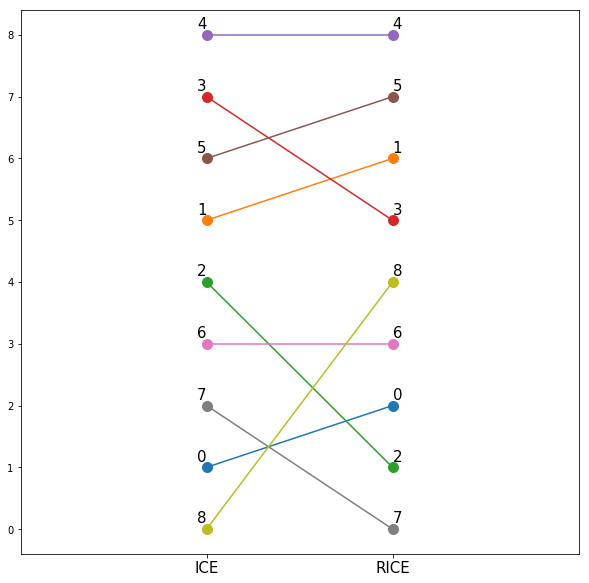

In [23]:
hypot = [0,1,2,3,4,5,6,7,8]

fig, ax = plt.subplots(1, figsize=(10,10))

for i in hypot:
    temp = sample1[sample1['hypothesisICE'] == i]
    plt.plot((1, 2),
             (temp['ICE_rank'].sum(), temp['RICE_rank'].sum()),
             marker='o', markersize=10
            )
    # start label
    plt.text(1, temp['ICE_rank'].values[0]+0.1, i, size=15, ha='right');
    # end label
    plt.text(2, temp['RICE_rank'].values[0]+0.1, i, size=15, ha='left')
    
plt.xlim(0, 3) 
ax.set_xticklabels(['ICE', 'RICE'])
plt.xticks([1, 2], size=15); 

#### Вывод

<div style="border:solid indigo 4px; padding: 20px">
    
- По фреймворку ICE тройка перспективных гипотез -  **8, 0, 7**  
- По фреймворку RICE четверка перспективных гипотез -  **7, 2, 0 и 6**
    
    **Причины изменения гипотез при расчете разными фреймворками**
    
    
    
- **Гипотеза 7** с 3го места в ICE перешла на 1е в RICE. Это связано с параметром reach. Параметр говорит о том, скольких пользователей затронет изменение, которое мы хотим внести. У 7й гипотезы reach - 10, это максимум. Этот балл идет в числитель формулы, соответственно и общий результат резко увеличится
    
    
- **Гипотеза 8** с 1го места в ICE перешла на 5е в RICE. Гипотеза имеет высокие баллы за влияние и уверенность в нее, средний балл по усилиям, но зато очень низкий балл reach, что и повлияло на вылет из 3ки перспективных гипотез. 
    
    
- **Гипотеза 0** со 2го места в ICE перешла на 3е в RICE. Гипотеза имеет очень невысокий параметр reach, что и понизило общий результат, по сравнению с гипотезами 2 и 7
    
    
- **Гипотеза 2** с 5го места в ICE перешла на 2е в RICE. Гипотезв имеет невысокие влияние на пользователя, но и невысокий балл усилий на ее исполнение. Зато имеет высокий балл reach! Что и привело гипотезу на 2е место.
    
    
- **Гипотеза 6** с 4го места в ICE перешла на совместный пъедестал 3го места с гипотезой 0 в RICE. Повлияли разные баллы, как итог - одинаковый результат
    
    

## **Часть 2. Проверка данных A/B-теста**

### Проверим размеры групп

In [24]:
length_df = (orders
             .groupby('group')
             .agg({'visitorId':'unique'})
             .reset_index()
            )
length_df

,group,visitorId
0,A,"[4069496402, 78758296, 295230930, 879864040, 3..."
1,B,"[3312258926, 3642806036, 1196621759, 232227988..."


In [25]:
print(f'Размер групп А = {len(length_df.loc[0,"visitorId"])}')
print(f'Размер групп B = {len(length_df.loc[1,"visitorId"])}')
print(f'Дельта между группами = {int((len(length_df.loc[1,"visitorId"]) / len(length_df.loc[0,"visitorId"]) - 1)*100)}%')

Размер групп А = 503
Размер групп B = 586
Дельта между группами = 16%


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- Нужно было более точно определять размеры групп. 16% - это многова то. Пользователи группы В могли совершить больше покупок, что повлияет на итоговую конверсию    
- Поскольку тест уже проведен, будем работать с тем, что есть

### Проверим наличие перехода пользователей из  группы А в В

In [26]:
# intersect1d - Находит пересечение двух массивов.
# Возвращает отсортированные уникальные значения, которые находятся в обоих входных массивах.
# остается только подсчитать длину массива повторяющихся значений

len(np.intersect1d(orders
                           .query('group == "A"')['visitorId']
                           .unique(),
                   orders
                           .query('group == "B"')['visitorId']
                           .unique()))                 

58

- **Какие траты у двойных агентов в обоих группах**

In [27]:
bad_user = np.intersect1d(orders
                           .query('group == "A"')['visitorId']
                           .unique(),
                   orders
                           .query('group == "B"')['visitorId']
                           .unique())
bad_user

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830], dtype=int64)

In [28]:
df_bad_user =(orders
                    .query('visitorId in @bad_user')
                    .groupby(['visitorId', 'group'])
                    .agg({'revenue':'sum'}).reset_index()
            )
df_bad_user.head()

,visitorId,group,revenue
0,8300375,A,1790
1,8300375,B,10510
2,199603092,A,19692
3,199603092,B,3488
4,232979603,A,60


In [29]:
purchase_A = df_bad_user.query('group == "A"')['revenue'].sum()
purchase_A

720147

In [30]:
purchase_B = df_bad_user.query('group == "B"')['revenue'].sum()
purchase_B

838788

In [31]:
print(f'В группе А двойные агенты потратили  {purchase_A}')
print(f'В группе B двойные агенты потратили  {purchase_B}')
print(f'Дельта составляет  {int(((purchase_B / purchase_A)-1) *100)}%')

В группе А двойные агенты потратили  720147
В группе B двойные агенты потратили  838788
Дельта составляет  16%


- **Посмотрим потраты двойных агентов на графике**

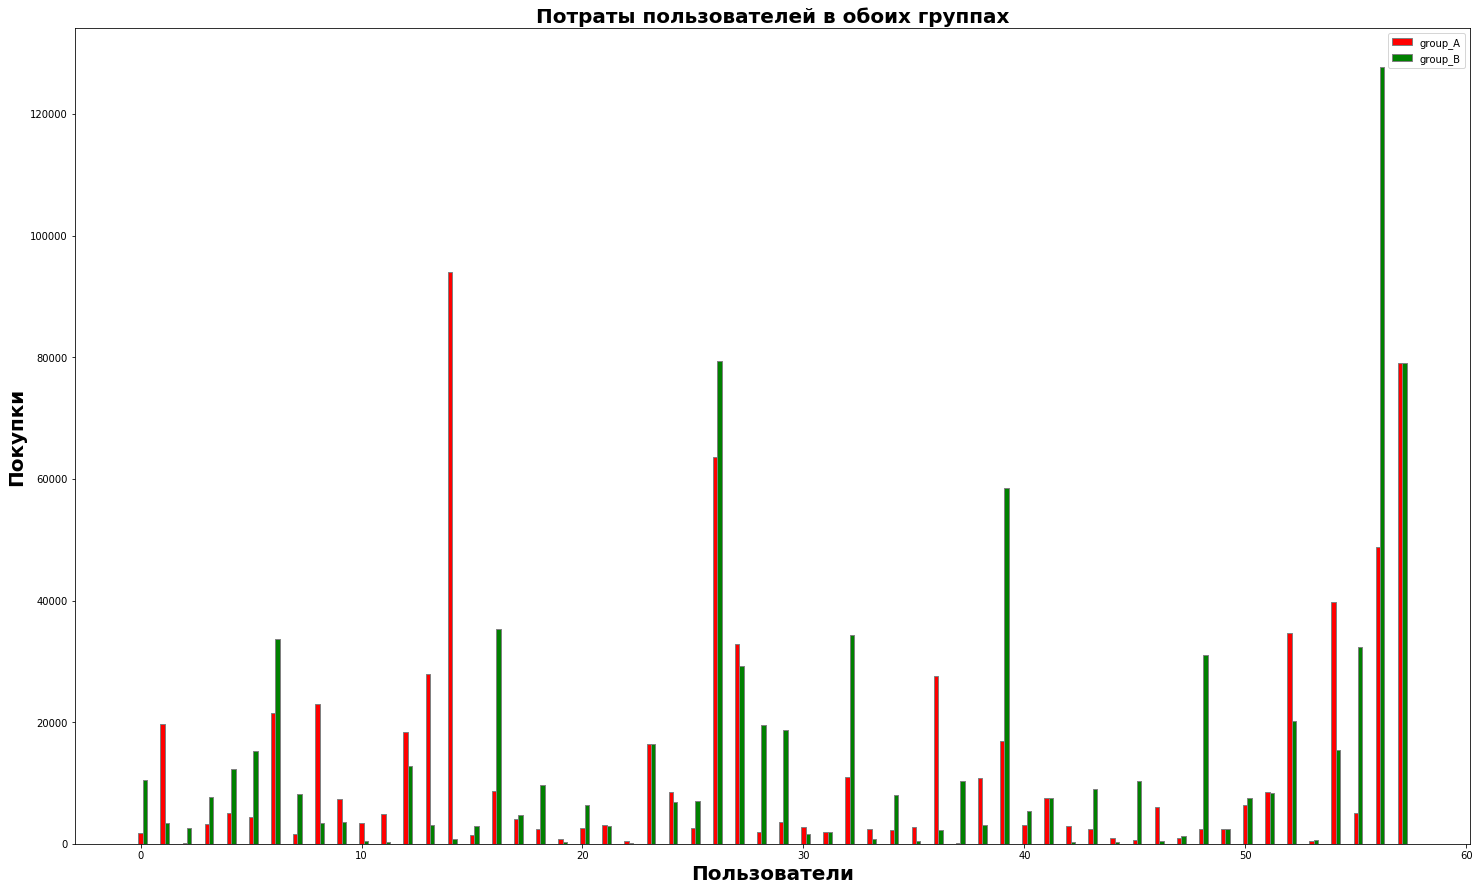

In [32]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(25, 15))

# set height of bar
group_A = list(df_bad_user.query('group == "A"')['revenue'])
group_B = list(df_bad_user.query('group == "B"')['revenue'])

# Set position of bar on X axis
br1 = np.arange(len(group_A))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, group_A, color ='r', width = barWidth,
        edgecolor ='grey', label ='group_A')
plt.bar(br2, group_B, color ='g', width = barWidth,
        edgecolor ='grey', label ='group_B')

# Adding Xticks
plt.xlabel('Пользователи',fontweight ='bold', fontsize = 20)
plt.ylabel('Покупки', fontweight ='bold', fontsize = 20)

plt.legend()
plt.title('Потраты пользователей в обоих группах', fontweight ='bold', fontsize = 20)
plt.show()

- Данные пользователи покупали в обоих группах на различные суммы. Какой то последовательности нет. В группе В эти пользователи начали тратить больше

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- Еще одна ошибка. 58 пользоватлей из начальной группы оказались в группе В. Такое нельзя допускать! Такие пльзователи могли совершить покупки, что повлияет на результат
- Поскольку тест уже проведен, будем работать с тем, что есть

### Проверим нормальность распределения средней выручки

**Сравним квантили нормального распределения и нашего**
- Красная линия – как распределены квартили нормального распределения
- Синие точки – наше распределение


**Построим боксплот**

- **Начнем с группы А**

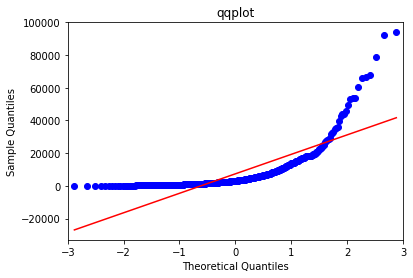

In [33]:
from statsmodels.graphics.gofplots import qqplot
qqplot(orders.query('group == "A"').groupby('visitorId')['revenue'].mean(), line='s')
plt.title('qqplot');

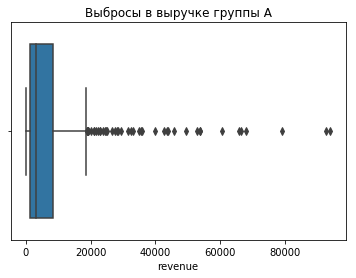

In [34]:
sns.boxplot(orders.query('group == "A"').groupby('visitorId')['revenue'].mean())
plt.title('Выбросы в выручке группы А');

- В группе А полно выбросов

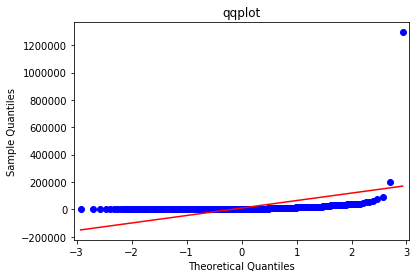

In [35]:
qqplot(orders.query('group == "B"').groupby('visitorId')['revenue'].mean(), line='s')
plt.title('qqplot');

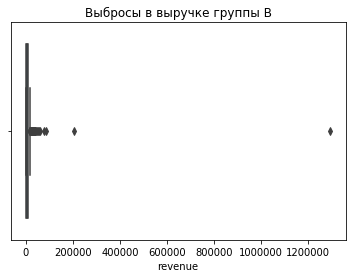

In [36]:
sns.boxplot(orders.query('group == "B"').groupby('visitorId')['revenue'].mean())
plt.title('Выбросы в выручке группы В');

- В группе B тоже есть выбросы, причем невероятно большие

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- По построенным графикам можно сделать вывод, что **распределение обоих групп ненормальное**
- Присутствуют выбросы
- На основании этого **будем применять для A/B-тестирования критерий Манна-Уитни**

### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
**Найдены следующие ошибки при проведения А/В теста**:
- размеры групп разные. Группа В больше на 16%
- 58 пользователей перешли из группы А в В, присутствовали в обоих группах
    
- Данные ошибки могут повлиять на окончательный результат. 
    
**Нормальность данных**    
- По построенным графикам можно сделать вывод, что **распределение обоих групп ненормальное**
- Присутствуют выбросы
- На основании этого **будем применять для A/B-тестирования критерий Манна-Уитни**   

## **Часть 3. Анализ A/B-теста**

- **Нулевая гипотеза А/В теста** предполагает, что результаты теста групп А и В не отличаются, а если отличия и присутствуют - это случайность. Будем это опровергать!
- **Альтернативная гипотеза** - группа В отличается от А. Будем делать вывод об истинности этой гипотезы

### Построим график кумулятивной выручки по группам

**Создадим массив уникальных пар значений дат и групп теста. Удалим дубликаты**

In [37]:
datesGroups = orders[['date','group']].drop_duplicates()

In [38]:
datesGroups.sort_values(by=['date','group']).head(5)

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A


- **Соберём агрегированные кумулятивные по дням данные о заказах**
- *Вычислим максимальную дату. Найдём число уникальных ID заказов. Подсчитаем сумму средних чеков*

In [39]:
# logical_and - логическое и, выдает булево значение, если True - в работу. 
# orders['date'] <= x['date'] - знак < дает накопительный эффект, учитывается совпадающая дата и все кто был до этой даты
# далее аггрегируем, получаем накопительные данные по группам

ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({'date' : 'max',
                          'group' : 'max',
                          'visitorId' : 'nunique',
                          'transactionId' : 'nunique',
                          'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

ordersAggregated.head(5)                   

,date,group,visitorId,transactionId,revenue
55,2019-08-01,A,20,24,148579
66,2019-08-01,B,20,21,101217
175,2019-08-02,A,38,44,242401
173,2019-08-02,B,43,45,266748
291,2019-08-03,A,62,68,354874


- **Соберём агрегированные кумулятивные по дням данные о посетителях**

In [40]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date' : 'max',
                            'group' : 'max',
                            'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )

visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


- **Объединим обе таблицы в одну**
- **Переименуем колонки для простоты понимания**

In [41]:
# в место способа объединения on используем left_on=[...], right_on=[...]
# Такой способ позволяет объединить две таблицы, используя два разных столбца.

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 
cumulativeData.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']
cumulativeData.sample(5)

,date,group,buyers,orders,revenue,visitors
55,2019-08-28,B,526,576,5328268,17177
11,2019-08-06,B,123,129,824337,3935
50,2019-08-26,A,425,467,3227918,15665
12,2019-08-07,A,131,145,740818,4629
41,2019-08-21,B,407,437,4426892,12874


- **Теперь построим график накапливаемой выручки**

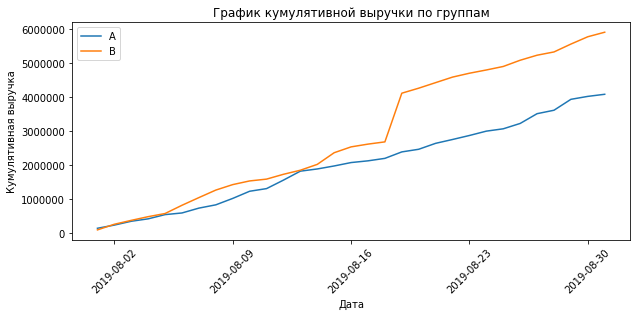

In [42]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,4))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

plt.xticks(rotation=45)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- Выручка по группам увеличивается на протяжении всего теста.
- Имеются всплески, резкий рост, что говорит о наличии либо сильно дорогих заказов, либо о росте числа заказов.
- Группа В имеет бОльшую выручку. Имеем резкий скачок выручки в середине теста.
- Выручка становится равномерной у обоих групп во 2й половине графика   

### Построим график кумулятивного среднего чека по группам

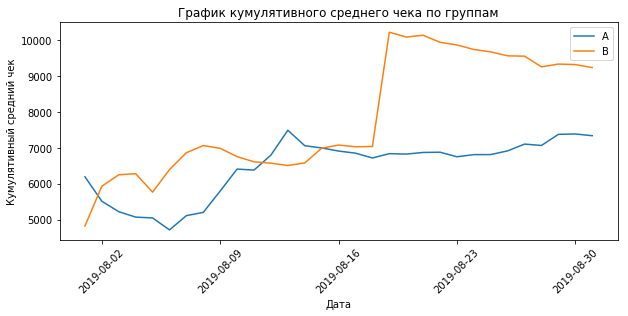

In [43]:
plt.figure(figsize=(10,4))

plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')

plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- Средний чек группы В превосходит группу А
- Чек по группам становится равномерным у обоих групп во 2й половине графика. Небольшой рост у группы А и падение у группы В
- Виден резкий скачок чека в середине теста у группы В. Значит попали крупные заказы

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

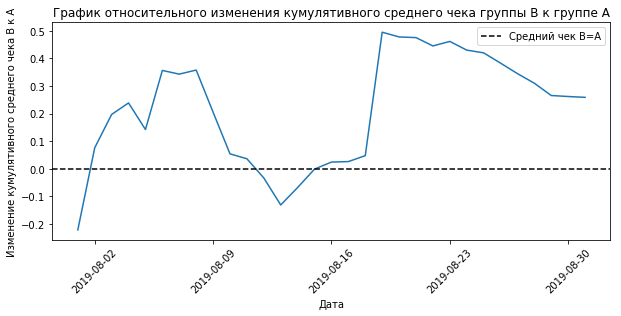

In [44]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = (cumulativeRevenueA
                           .merge(cumulativeRevenueB,
                                  left_on='date',
                                  right_on='date',
                                  how='left',
                                  suffixes=['A', 'B'])
                          )

# cтроим отношение средних чеков
plt.figure(figsize=(10,4))

plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--', label="Средний чек В=А")
plt.legend()
plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивного среднего чека В к А');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- График резко скачет, что говорит о том, что есть крупные заказы. 
- Накопительные средний чек группы В в разы выше, чем у группы А

### Построим график кумулятивной конверсии по группам

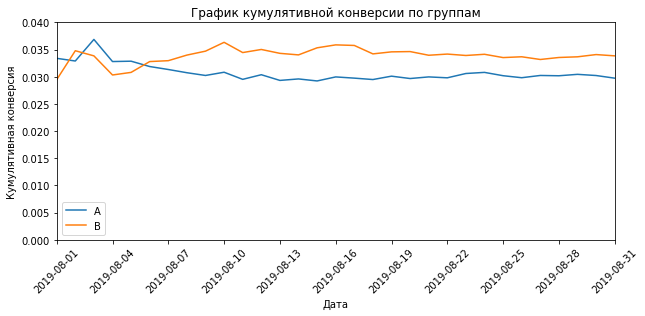

In [45]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,4))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), 0, 0.04])

plt.xticks(rotation=45)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- В начале конверсия группы А была больше, после 5го числа все изменилось
- После 5го числа накопительная конверсия группы В обогнала группу А и установилась на одном уровне
- После 5го числа накопительная конверсия группы А установилась на одном уровне, ниже группы В

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

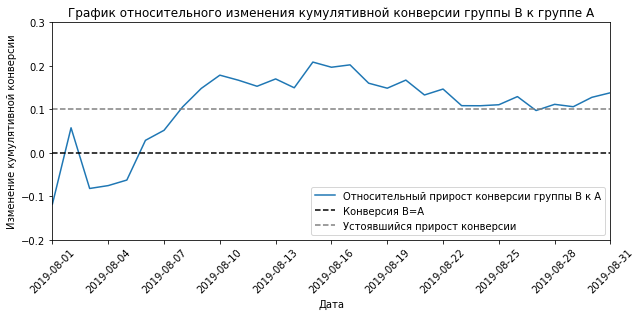

In [46]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
                                .merge(cumulativeDataB[['date','conversion']],
                                       left_on='date',
                                       right_on='date',
                                       how='left',
                                       suffixes=['A', 'B'])
                              )

plt.figure(figsize=(10,4))                               
plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1,
         label="Относительный прирост конверсии группы B к A")

plt.axhline(y=0, color='black', linestyle='--', label="Конверсия В=А")
plt.axhline(y=0.1, color='grey', linestyle='--', label="Устоявшийся прирост конверсии")
plt.legend()
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), -0.2, 0.3])

plt.xticks(rotation=45)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменение кумулятивной конверсии');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- В начале конверсия группы В была меньше, чем у группы А
- После 5го числа конверсия группы В обогнала группу А
- После 21го числа конверсия группы В немного опустилась, но все еще была лучше, чем у А
- В конце начался небольшое рост конверсии
- Во 2й половине теста увеличение конверсии устоялось на уровне 10%

### Построим точечный график количества заказов по пользователям

- Узнаем, есть ли аномалии в количестве заказов

- ***Подсчитаем количество заказов по пользователям***

In [47]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


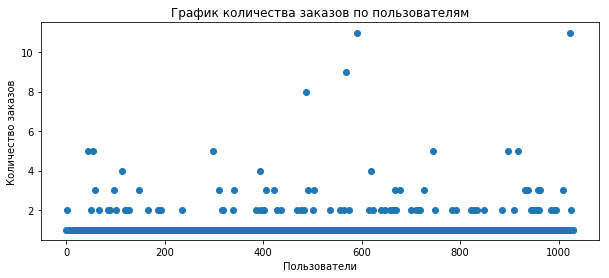

In [48]:
plt.figure(figsize=(10,4))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])


plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
    
- Подавляющая доля пользователей совершают только 1 покупку. С удержанием явная проблема
- Некоторые совершают 2 покупки и даже более.
- Но что будем считать аномалиями? Далее посмотрим на процентили

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [49]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 
- Не более 5% пользователей совершили более 2х покупок
- Не более 1% пользователей совершили более 4х покупок 
    
    
- менее 5% будем считать аномальными     
- **Будем считать аномальными покупки более 2х раз**

### Построим точечный график стоимостей заказов

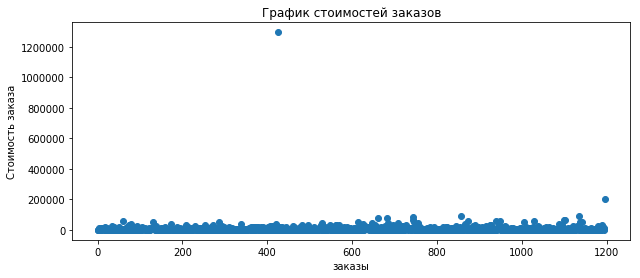

In [50]:
plt.figure(figsize=(10,4))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ticklabel_format(style='plain', axis='y') # убирает экспоненциальный формат

plt.title('График стоимостей заказов')
plt.xlabel('заказы')
plt.ylabel('Стоимость заказа');

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 
- Заказов более 100 000 почти нет
- Есть заказик на 200 000 и огромный заказ на сумму боле  1 200 000. Что то прям мега дорогое)
- ЧТобы более точно определить анамалии, найдем процентили

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [51]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 

- Не более 5% заказов стоят более 28 000
- Не более 1% заказов стоят более 58 233 
        
    
- менее 5% будем считать аномальными     
- **Будем считать аномальными стоимости заказов более 28 000**

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

- **Сформулируем гипотезы.**
            - Нулевая: различий в конверсии между группами нет. 
            - Альтернативная: различия в конверсии между группами есть.


- **Критический уровень статистической определяем в 5%**

- ***Найдем накопительное число посетителей по дням обоих групп***

In [52]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [53]:
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [54]:
visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [55]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

- ***Найдем накопительное число стоимости заказов по дням обоих групп***

In [56]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [57]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

- ***Объединим полученные таблицы***

In [58]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


***Значения колонок:***

- 	**date** — дата;
- 	**ordersPerDateA** — количество заказов в выбранную дату в группе A;
- 	**revenuePerDateA** — суммарная выручка в выбранную дату в группе A;
- 	**ordersPerDateB** — количество заказов в выбранную дату в группе B;
- 	**revenuePerDateB** — суммарная выручка в выбранную дату в группе B;
- 	**ordersCummulativeA** — суммарное число заказов до выбранной даты включительно в группе A;
- 	**revenueCummulativeA** — суммарная выручка до выбранной даты включительно в группе A;
- 	**ordersCummulativeB** — суммарное количество заказов до выбранной даты включительно в группе B;
- 	**revenueCummulativeB** — суммарная выручка до выбранной даты включительно в группе B;
- 	**visitorsPerDateA** — количество пользователей в выбранную дату в группе A;
- 	**visitorsPerDateB** — количество пользователей в выбранную дату в группе B;
- 	**visitorsCummulativeA** — количество пользователей до выбранной даты включительно в группе A;
- 	**visitorsCummulativeB** — количество пользователей до выбранной даты включительно в группе B.


- ***Теперь посчитаем статистическую значимость различия в конверсии между группами.***
- Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [59]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

- Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к **проверке критерием Манна-Уитни.**

In [60]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

- Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.
- Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.



In [61]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("прирост конверсии группы B к А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.008
прирост конверсии группы B к А = 0.138


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 
- p-value = 0.017 и это < 0.05, значит мы **отвергаем нулевую гипотезу о том, что различий в конверсиях нет**. Различие есть
- Статистически значимые различия в конверсии подтверждаем прирост конверсии группы В на 13%


### Посчитаем  статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

- **Сформулируем гипотезы.**
            - Нулевая гипотеза: различий в среднем чеке между группами нет. 
            - Альтернативная гипотеза: различия в среднем чеке между группами есть



- Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

- Также найдём относительные различия в среднем чеке между группами


In [62]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('различие группы В к А - {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
различие группы В к А - 0.259


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 

- p-value = 0.729 и это > 0.05, значит мы **не можем отвергнуть нулевую гипотезу о том, что различий в среднем чеке нет**. Различие есть
- Хотя средний чек группы В > среднего чека группы А на 25%. На такое различие мог повлиять крупный заказа.


### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

- **Узнаем, сколько всего аномальных пользователей**

- Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [63]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(f'Число аномальных пользователей - {abnormalUsers.shape}')

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Число аномальных пользователей - (74,)


- **Узнаем, как их действия повлияли на результаты теста.**

In [64]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)



sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

- Применим статистический критерий Манна-Уитни к полученным выборкам

In [65]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('прирост конверсии группы B к А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.007
прирост конверсии группы B к А = 0.173


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 

- **Было** p-value = 0.017 и прирост конверсии группы B к А = 0.138
- **Стало** p-value = 0.013 и прирост конверсии группы B к А = 0.173    
    
- p-value практически не изменился, как и прирост конверсии группы В, даже увеличился на 4%. **Можно сказать, что очистка данных не повлияла на конверсию.** Увеличение конверсии В к А после очистки крупных заказов, говорит о том, что группа В и без выбросов конвертируется лучше 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [66]:
 print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "различие группы В к А {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.369
различие группы В к А -0.020


#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 

- **Было** p-value = 0.729 и различие группы В к А - 0.259
- **Стало** p-value = 0.738 и различие группы В к А = -0.02    
    
- p-value практически не изменился, а вот средний чек изменился. Теперь **средний чек группы В стал практически равным чеку группы А**, упал с 25% до 2%! Что еще раз подтверждает наличие крупных заказов в группе В, которые повлияли на средний чек

### Принятие решения по результатам теста 

- **Подведем итоги**

1. Cтатистически значимое различие по конверсии по сырым данным: **B > А на 13%**
2. Cтатистически значимое различие по конверсии по чистым данным: **B > А на 17%**
3. Статистически значимое различие в среднем чеке заказа по сырым данным:  **B > А на 25%**
4. Статистически значимое различие в среднем чеке заказа по чистым данным:  **B < А на 2%**
5. График относительного изменения кумулятивной конверсии группы B к A: **В > A почти все время**

#### Вывод

<div style="border:solid indigo 1px; padding: 20px">
 

- Есть статистически значимое превосходство по конверсии группы В к А как по сырым данным, так и по чистым.
- Средний чек по сырым данным был, больше у группы В, но, после очистки, средние чеки почти сравнялись, что говорит о крупных заказах в группе В. ПОэтому по чеку определенный вывод сделать нельзя.
- График различия конверсии между группами говорит о том, что результаты группы B лучше группы A: есть рост почти на всем продолжении теста
- На основе данных выводов принимаем решение  **остановить тест, зафиксировать победу группы В**

## **Вывод**

<div style="border:solid green 4px; padding: 20px">
 
**<font color="red">Была проведена приоритизация гипотез и сделаны следующие выводы</font>**
    
- По фреймворку ICE тройка перспективных гипотез -  **8, 0, 7**  
- По фреймворку RICE четверка перспективных гипотез -  **7, 2, 0 и 6**
    
    **Причины изменения гипотез при расчете разными фреймворками**
    

- **Гипотеза 7** с 3го места в ICE перешла на 1е в RICE. Это связано с параметром reach. Параметр говорит о том, скольких пользователей затронет изменение, которое мы хотим внести. У 7й гипотезы reach - 10, это максимум. Этот балл идет в числитель формулы, соответственно и общий результат резко увеличится
    
    
- **Гипотеза 8** с 1го места в ICE перешла на 5е в RICE. Гипотеза имеет высокие баллы за влияние и уверенность в нее, средний балл по усилиям, но зато очень низкий балл reach, что и повлияло на вылет из 3ки перспективных гипотез. 
    
    
- **Гипотеза 0** со 2го места в ICE перешла на 3е в RICE. Гипотеза имеет очень невысокий параметр reach, что и понизило общий результат, по сравнению с гипотезами 2 и 7
    
    
- **Гипотеза 2** с 5го места в ICE перешла на 2е в RICE. Гипотезв имеет невысокие влияние на пользователя, но и невысокий балл усилий на ее исполнение. Зато имеет высокий балл reach! Что и привело гипотезу на 2е место.
    
    
- **Гипотеза 6** с 4го места в ICE перешла на совместный пъедестал 3го места с гипотезой 0 в RICE. Повлияли разные баллы, как итог - одинаковый результат   
    
    
**<font color="red">Была проведена проверка данных А/В теста</font>**  
    
    
**Найдены следующие ошибки при проведения А/В теста**:
- размеры групп разные. Группа В больше на 16%
- 58 пользователей перешли из группы А в В, присутствовали в обоих группах
- эти 58 пользователей потратили в группе В на 16% больше, чем в группе А    
- Данные ошибки могут повлиять на окончательный результат. 
    
**Нормальность данных**    
- По построенным графикам можно сделать вывод, что **распределение обоих групп ненормальное**
- Присутствуют выбросы
- На основании этого **будем применять для A/B-тестирования критерий Манна-Уитни**  
        
    
**<font color="red">Был проведен анализ А/В теста</font>**
    
**Построен график кумулятивной выручки по группам, где увидили, что:**
- Выручка по группам увеличивается на протяжении всего теста.
- Имеются всплески, резкий рост, что говорит о наличии либо сильно дорогих заказов, либо о росте числа заказов.
- Группа В имеет бОльшую выручку. Имеем резкий скачок выручки в середине теста.
- Выручка становится равномерной у обоих групп во 2й половине графика  
    
**Построен график кумулятивного среднего чека по группам, где увидили, что:**  
- Средний чек группы В превосходит группу А
- Чек по группам становится равномерным у обоих групп во 2й половине графика. Небольшой рост у группы А и падение у группы В
- Виден резкий скачок чека в середине теста у группы В. Значит попали крупные заказы 
    
**Построены графики относительного изменения кумулятивного среднего чека и конверсии группы B к группе A, где увидили, что:**
- График чека резко скачет, что говорит о том, что есть крупные заказы. 
- Накопительные средний чек группы В в разы выше, чем у группы А
- Конверсия группы В выше, чем у А
- В начале конверсия группы В была меньше, чем у группы А
- После 5го числа конверсия группы В обогнала группу А
- После 21го числа конверсия группы В немного опустилась, но все еще была лучше, чем у А
- В конце начался небольшое рост конверсии группы В
    
**Построены точечные графики количества заказов и их стоимости, надены 95е и 99е процентили, сделаны выводы:**  
- Подавляющая доля пользователей совершают только 1 покупку. С удержанием явная проблема
- Некоторые совершают 2 покупки и даже более.
- Не более 5% пользователей совершили более 2х покупок
- Не более 1% пользователей совершили более 4х покупок    
- менее 5% будем считать аномальными     
- *Будем считать аномальными покупки более 2х раз*
- Заказов более 100 000 почти нет
- Есть заказик на 200 000 и огромный заказ на сумму боле  1 200 000. Что то прям мега дорогое)
- Не более 5% заказов стоят более 28 000
- Не более 1% заказов стоят более 58 233       
- менее 5% будем считать аномальными     
- *Будем считать аномальными стоимости заказов более 28 000*
    
**Посчитана статистическая значимость различий в конверсии между группами по «сырым» и «очищенным» данным, сделаны выводы:**
- *По сырым данным* p-value = 0.017 и прирост конверсии группы B к А = 0.138
- *По чистым данным* p-value = 0.013 и прирост конверсии группы B к А = 0.173    
- p-value практически не изменился, как и прирост конверсии группы В, даже увеличился на 4%. *Можно сказать, что очистка данных не повлияла на конверсию.* Увеличение конверсии В к А после очистки крупных заказов, говорит о том, что группа В и без выбросов конвертируется лучше   
    
**Посчитана статистическая значимость различий в среднем чеке заказа между группами по «сырым» и «очищенным» данным, сделаны выводы:**
- *По сырым данным* p-value = 0.729 и различие группы В к А - 0.259
- *По чистым данным* p-value = 0.738 и различие группы В к А = -0.02    
- p-value практически не изменился, а вот средний чек изменился. Теперь *средний чек группы В стал практически равным чеку группы А*, упал с 25% до 2%! Что еще раз подтверждает наличие крупных заказов в группе В, которые повлияли на средний чек   
    

**Подведен итог и принято решение по результатам теста**    
- Есть статистически значимое превосходство по конверсии группы В к А как по сырым данным, так и по чистым.
- Средний чек по сырым данным был, больше у группы В, но, после очистки, средние чеки почти сравнялись, что говорит о крупных заказах в группе В. Поэтому по чеку определенный вывод сделать нельзя.
- График различия конверсии между группами говорит о том, что результаты группы B лучше группы A: есть рост почти на всем продолжении теста
- **Поскольку по очищеным данным конверсия группы В все равно больше, значит крупные покупки перешедших пользователей из группы А не повлияли на результат.**
- На основе данных выводов принято решение  **<font color="red">остановить тест, зафиксировать победу группы В</font>**